In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def chirp_wave(t,a,b,amp,phase):
    f = 2.*np.pi*(a*t**2 + b * t)
    y = amp*np.sin(2.*np.pi*f+phase)
    return y,f

def sin_wave(t,f,amp,phase):
    y = amp* np.sin(2. * np.pi * f * t + phase)
    return y,f

def gen_stair_step(rst,step,frequency,sampling_rate):
    total_step = int(36000*frequency)
    total_step = int(frequency)

    total_time = total_step // step * rst
    #frames_per_second = 1000

    total_frames = int(total_time * sampling_rate)

    steps_per_width = total_time // rst # number of step

    f = np.linspace(0, steps_per_width, total_frames) # step
    f = np.floor(f) * step # step height
    t = np.linspace(0, total_time, total_frames) # step

    return t,f,total_time

In [4]:
sampling_rate = 2.**13
time_interval = 1./sampling_rate
total_time = 10

t = np.linspace(0, total_time, int(total_time*sampling_rate))

In [5]:
s1, f1 = sin_wave(t,1,1,0) # no chirp
s2, f2 = sin_wave(t,1,1,np.deg2rad(90)) # 90 degree phase shift
s3, f3 = chirp_wave(t,0.03,0,1,0) # chirp from 0 to 0.5 Hz in 10 seconds
s4, f4 = chirp_wave(t,0.03,0,1,np.deg2rad(90)) # chirp from 0 to 0.5 Hz in 10 seconds with 90 degree phase shift

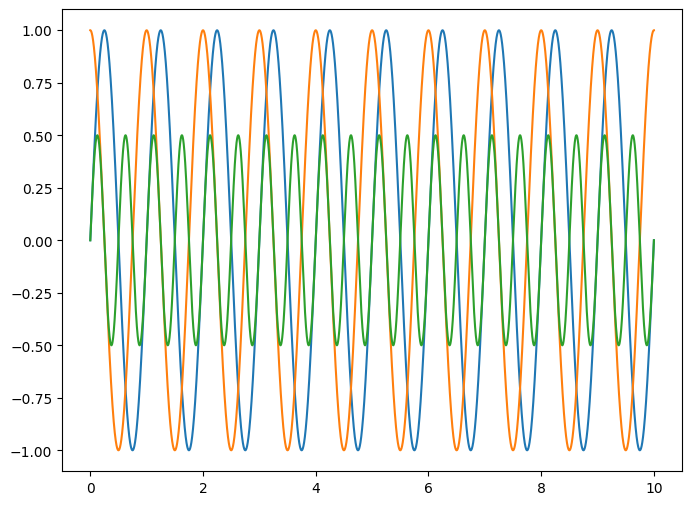

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(t,s1)
ax.plot(t,s2)
ax.plot(t,s1*s2)

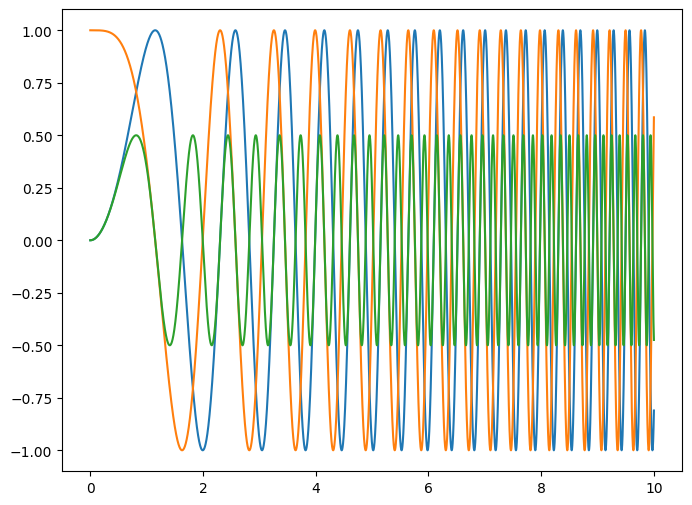

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(t,s3)
ax.plot(t,s4)
ax.plot(t,s3*s4)

Text(0, 0.5, 'Value')

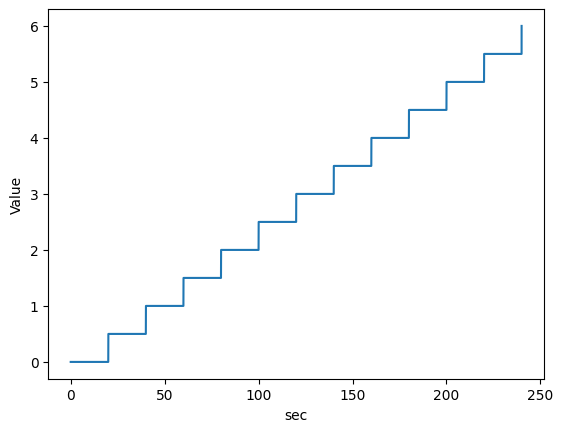

In [8]:
t,f,total_time = gen_stair_step(20,0.5,2*np.pi,100)

plt.plot(t,f)
plt.xlabel('sec')
plt.ylabel('Value')

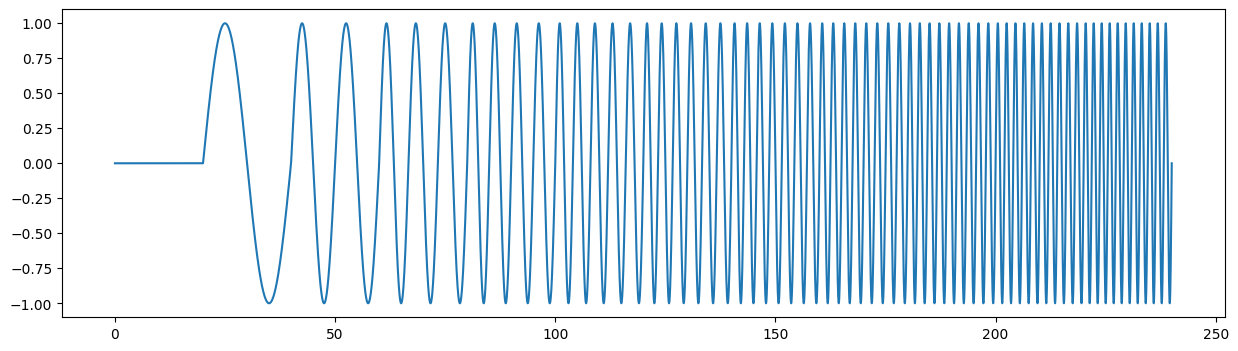

In [9]:
s7, f7 = sin_wave(t,f/10,1,0)
s8, f8 = sin_wave(t,f/10,1,np.rad2deg(90))

fig, ax = plt.subplots(1, 1, figsize=(15,4))
ax.plot(t,s7)
#ax.plot(t,s8)
#ax.plot(t,s7*s8)
#ax.set_xlim(0,30)
x_line = 0
for i in range(13):
    #ax.axvline(x=x_line,c='black',ls='--')
    x_line += 20

Text(0, 0.5, 'Value')

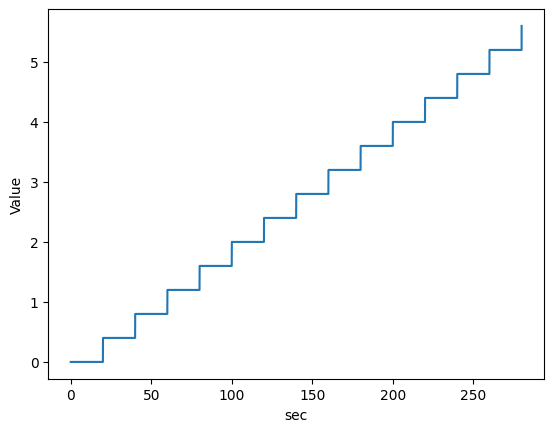

In [10]:
t,f,total_time = gen_stair_step(20,0.4,2*np.pi,100)

plt.plot(t,f)
plt.xlabel('sec')
plt.ylabel('Value')

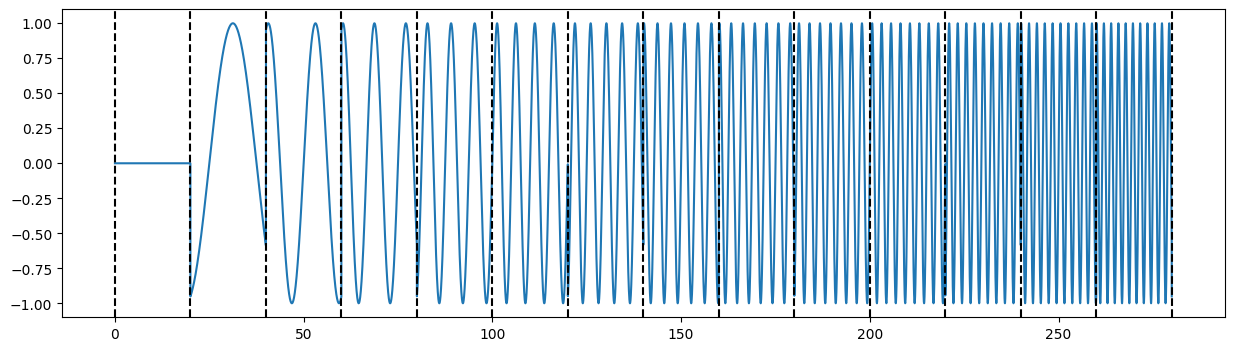

In [11]:
s7, f7 = sin_wave(t,f/10,1,0)
s8, f8 = sin_wave(t,f/10,1,np.rad2deg(90))

fig, ax = plt.subplots(1, 1, figsize=(15,4))
ax.plot(t,s7)
#ax.plot(t,s8)
#ax.plot(t,s7*s8)
#ax.set_xlim(0,30)
x_line = 0
for i in range(15):
    ax.axvline(x=x_line,c='black',ls='--')
    x_line += 20

Number of crossings: 132
Crossing indices: [ 20804  29195  40401  44597  50401  54597  60267  63064  66934  69731
  73601  76398  80200  82298  85200  87298  90200  92298  95200  97298
 100160 101838 104160 105838 108160 109838 112160 113838 116160 117838
 120133 121532 123466 124865 126800 128198 130133 131532 133466 134865
 136800 138198 140114 141313 142971 144170 145828 147027 148685 149884
 151542 152741 154399 155598 157257 158455 160099 161148 162599 163648
 165099 166148 167599 168648 170099 171148 172599 173648 175099 176148
 177599 178648 180088 181020 182310 183243 184533 185465 186755 187687
 188977 189909 191199 192132 193421 194354 195644 196576 197866 198798
 200079 200918 202079 202918 204079 204918 206079 206918 208079 208918
 210079 210918 212079 212918 214079 214918 216079 216918 218079 218918
 220072 220835 221890 222653 223708 224471 225526 226289 227344 228107
 229163 229925 230981 231744 232799 233562 234617 235380 236435 237198
 238253 239016]


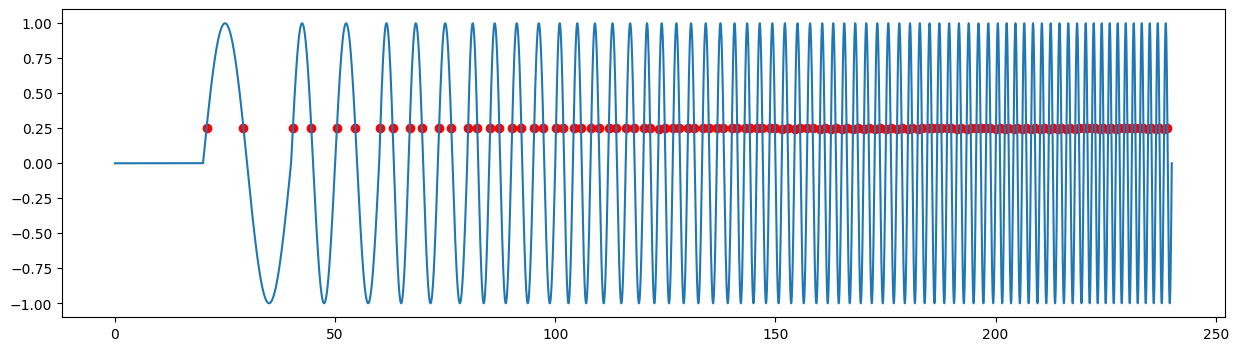

In [18]:
t,f,total_time = gen_stair_step(20,0.5,2*np.pi,1000)
s7, f7 = sin_wave(t,f/10,1,0)
s8, f8 = sin_wave(t,f/10,1,np.rad2deg(90))

thresh = 0.25
buf = np.asarray(s7) - thresh
cross_num = np.sum(buf[:-1] * buf[1:] < 0)
cross_idx = np.where(buf[:-1] * buf[1:] < 0)[0]

print(f"Number of crossings: {cross_num}")
print(f"Crossing indices: {cross_idx}")

fig, ax = plt.subplots(1, 1, figsize=(15,4))

ax.plot(t,s7)
ax.scatter(t[cross_idx], s7[cross_idx], color='red', label='Crossings')

